# Spark Streaming Fundamentals

In [ ]:
import findspark
findspark.init()

Let's imagine that we want to process a set of streaming data that comes to us in JSON format. We want to count the number of events per action type.

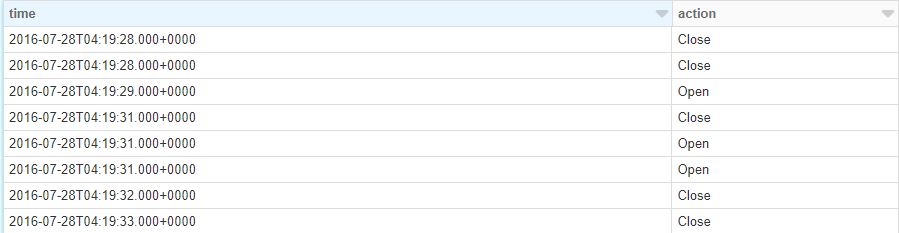

In [ ]:
from pyspark.sql.functions import *

streamingInputDF = (
  spark
    .readStream                       
    .schema(jsonSchema)               # Set the schema of the JSON data
    .option("maxFilesPerTrigger", 1)  # Treat a sequence of files as a stream by picking one file at a time
    .json(inputPath)
)


In [ ]:
streamingCountsDF = (                 
  streamingInputDF
    .groupBy(
      streamingInputDF.action, 
      window(streamingInputDF.time, "1 hour"))
    .count()
)


In [ ]:
# Is this DF actually a streaming DF?
streamingCountsDF.isStreaming

streamingCountsDF is a streaming Dataframe. We can start applying the calculus by defining the output of the results. In our case, we want to query for counts so we'll set the entire 1-hour set of counts to be in an in-memory table.

In [ ]:
query = (
  streamingCountsDF
    .writeStream
    .format("memory")        # memory = store in-memory table 
    .queryName("counts")     # counts = name of the in-memory table
    .ouputMode("complete") 
    .start()
)  # complete = all the counts should be in the table
   
